# Spotify recommendation system 

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set your credentials
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id="260e2fd648cf42dbab5157bb9857e07e",
    client_secret="aabb18f4c93440f7b115cfe963189e9f",
    redirect_uri="http://127.0.0.1:8888/callback",
    scope="user-library-read"
))
# Get saved tracks
results = sp.current_user_saved_tracks(limit=50)
tracks = []

In [2]:
while results:
    for item in results['items']:
        track = item['track']
        tracks.append({
            'track_name': track['name'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'release_date': track['album']['release_date']
        })
    # Pagination
    if results['next']:
        results = sp.next(results)
    else:
        results = None

# Convert to DataFrame and save to CSV
df = pd.DataFrame(tracks)
df.to_csv('spotify_user_tracks.csv', index=False)

In [3]:
df.head()

,track_name,artist,album,release_date
0,Glue Song,beabadoobee,Glue Song,2023-02-14
1,At My Worst (feat. Kehlani),Pink Sweat$,PINK PLANET,2021-02-12
2,when the party's over,Billie Eilish,when the party's over,2018-10-17
3,Eyes Off You,PRETTYMUCH,Phases - EP,2019-05-24
4,blue,yung kai,blue,2024-08-02


In [5]:
# Load the CSV (if already saved)
data = pd.read_csv('spotify_user_tracks.csv')

In [6]:
# Extract the release year and decade
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year
data['decade'] = (data['year'] // 10) * 10 

In [7]:
# Drop rows where year/decade could not be parsed
data = data.dropna(subset=['decade'])

C:\Users\ISAIAH\AppData\Local\Temp\ipykernel_15036\2293936907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decade', data=data, palette='viridis')


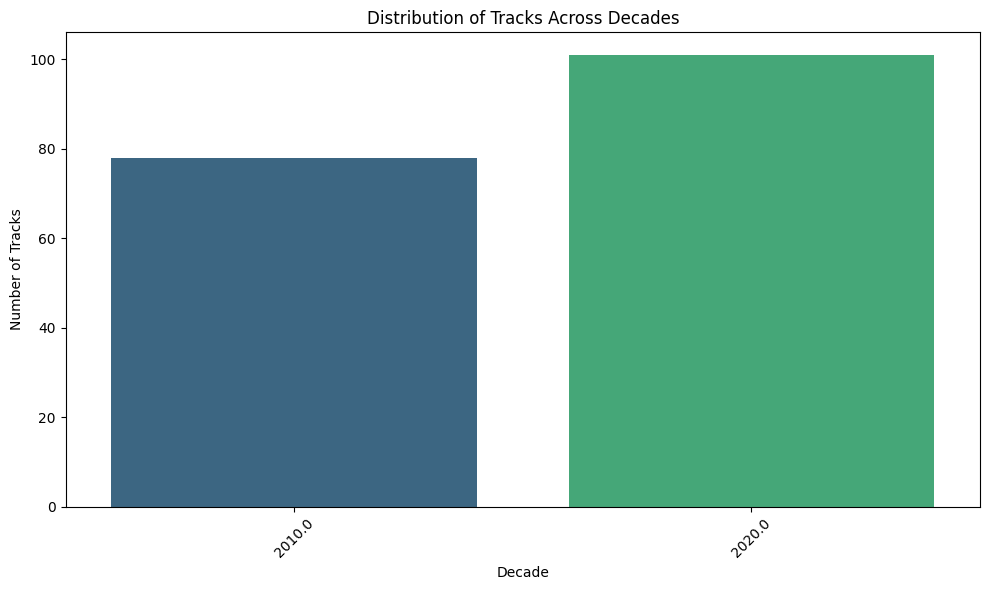

In [10]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', data=data, palette='viridis')

# Add labels and title
plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()